#### Description

This code uses <b>Random Search</b> to find optimal hyperparameters for the GA_2_2 GeneticAlgorithm run method:
* base_mutation_rate
* chromosomes
* islands
* num_parents
* gene_flow_rate

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
import random

from GA_2_2 import GeneticAlgorithm

In [2]:
# Control variables
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
pop_size = 200
generations = 100
precision = 0.1

# Testing variables
combinations = 50
run_per_combination = 5
results = []
target_expressions = [0, 1]

# Visualisation variables
polynomial_degree = 1

In [3]:
for target_expression in target_expressions:
    for combination_id in range(combinations):

        # Randomly select values for each of the dependent variables
        base_mutation_rate = random.uniform(0, 1)
        chromosomes = random.randint(1, 16)
        islands = random.randint(1, 16)
        num_parents = random.randint(1, 16)
        gene_flow_rate = random.uniform(0, 1)

        # Store the error and run time for each run
        errors = []
        run_times = []

        print(f'Running with base_mutation_rate={base_mutation_rate:.3f} | chromosomes={chromosomes} | islands={islands} | num_parents={num_parents} | gene_flow_rate={gene_flow_rate:.3f}', end='')

        for run_id in range(run_per_combination):
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                max_length=max_length,
                pop_size=pop_size,
                generations=generations,
                base_mutation_rate=base_mutation_rate,  # Dependent variable
                precision=precision,
                chromosomes=chromosomes, # Dependent variable
                islands=islands, # Dependent variable
                num_parents=num_parents, # Dependent variable
                gene_flow_rate=gene_flow_rate, # Dependent variable
                print_progress=False
            )
            try:
                # Time the run
                start_time = time.time()
                best_sequence, best_prediction = ga.run()
                end_time = time.time()
                run_time = end_time - start_time
            except Exception as e:
                print(f' Error: {e}')
                continue

            errors.append(abs(best_prediction - target_expression))
            run_times.append(run_time)
            
        # Record the results
        results.append({
            'target_expression': target_expression,
            'combination_id': combination_id + 1,
            'run_id': run_id + 1,
            'base_mutation_rate': base_mutation_rate,
            'chromosomes': chromosomes,
            'num_parents': num_parents,
            'islands': islands,
            'gene_flow_rate': gene_flow_rate,
            'errors': errors,
            'run_times': run_times,
            'average_error': np.mean(errors),
            'average_run_time': np.mean(run_times)
        })
            
        # print Averaged combination error
        print(f' | average_error={np.mean(errors):.3f}')

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Running with base_mutation_rate=0.905 | chromosomes=10 | islands=1 | num_parents=7 | gene_flow_rate=0.054WARNING:tensorflow:From c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_2_2.py:111: _EagerTensorBase.cpu (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 | average_error=0.159
Running with base_mutation_rate=0.778 | chromosomes=14 | islands=11 | num_parents=1 | gene_flow_rate=0.135 | average_error=0.163
Running with base_mutation_rate=0.992 | chromosomes=12 | islands=15 | num_parents=5 | gene_flow_rate=0.620 | average_error=0.162
Running with base_mutation_rate=0.180 | chromosomes=12 | islands=4 | num_parents=7 | gene_flow_rate=0.655 | average_error=0.148
Running with base_mutation_rate=0.654 | chromosomes=15 | islands=4 | num_parents=4 | gene_flow_rate=0.965 | average_error=0.162
Running with base_mutation_rate=0.041 | chromosomes=14 | islands=1 | num_parents=7 | gene_flow_rate=0.414 | average_error=0.097
Running with base_mutation_rate=0.214 | chromosomes=13 | islands=8 | num_parents=6 | gene_flow_rate=0.197 | average_error=0.148
Running with base_mutation_rate=0.122 | chromosomes=6 | islands=9 | num_parents=16 | gene_flow_rate=0.289 | average_error=0.120
Running with base_mutation_rate=0.579 | chromosomes=6 | islands=4 | num_parents

In [4]:
results_df.sort_values(by='average_error').head()

,target_expression,combination_id,run_id,base_mutation_rate,chromosomes,num_parents,islands,gene_flow_rate,errors,run_times,average_error,average_run_time
92,1,43,5,0.051597,7,15,3,0.358883,"[0.09296447038650513, 0.04188895225524902, 0.0...","[7.450117826461792, 8.20251727104187, 7.456437...",0.065873,7.870068
62,1,13,5,0.074313,9,3,16,0.705094,"[0.07766640186309814, 0.07949167490005493, 0.0...","[30.82663345336914, 30.972209692001343, 32.007...",0.074426,29.281178
98,1,49,5,0.011903,2,5,7,0.933421,"[0.08091974258422852, 0.054686665534973145, 0....","[13.050586223602295, 14.209464311599731, 13.58...",0.075096,13.362561
50,1,1,5,0.077426,7,10,15,0.563590,"[0.10661846399307251, 0.0890737771987915, 0.06...","[31.652918100357056, 30.22426199913025, 32.298...",0.078883,31.140017
87,1,38,5,0.086526,15,9,2,0.415677,"[0.07517921924591064, 0.08890664577484131, 0.0...","[6.826664209365845, 6.329203367233276, 6.68927...",0.082857,6.615010


In [5]:
# averaged_df = results_df.groupby([
#     'target_expression',
#     'combination_id',
#     'base_mutation_rate',
#     'chromosomes',
#     'num_parents',
#     'islands',
#     'gene_flow_rate'])['error'].mean().reset_index()

# averaged_df.sort_values(by='error').head()

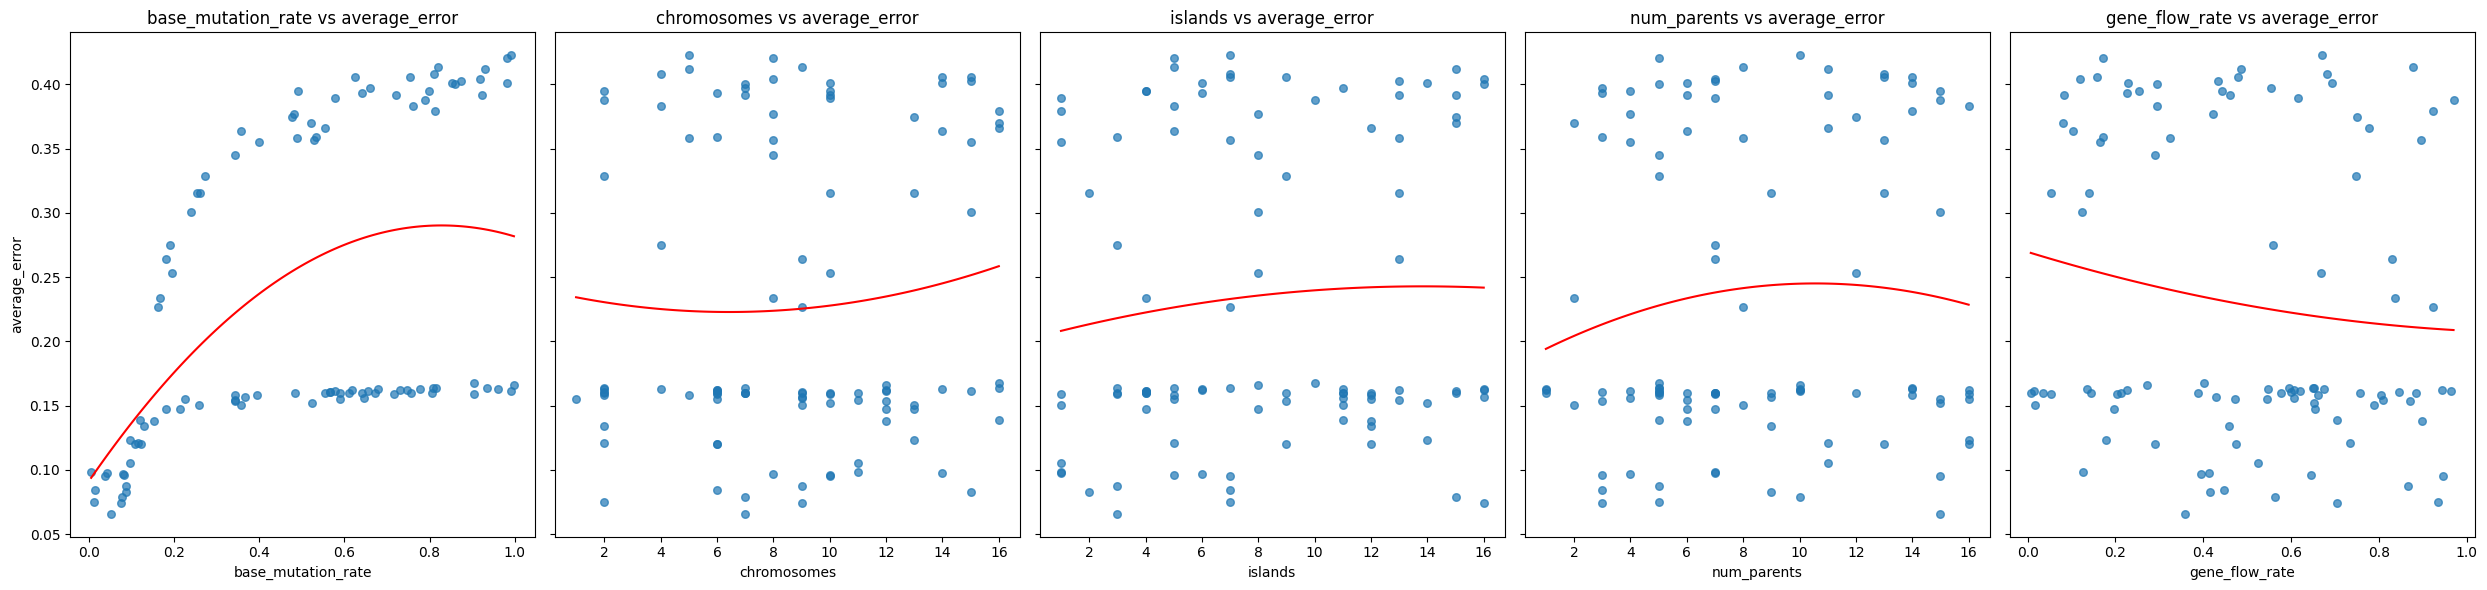

In [6]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

dependent_variables = ['base_mutation_rate', 'chromosomes', 'islands', 'num_parents', 'gene_flow_rate']
polynomial_degree = 2 

for i, dependent_variable in enumerate(dependent_variables):
    ax = axs[i]
    ax.scatter(results_df[dependent_variable], results_df['average_error'], s=30, alpha=0.7)

    # Fit and plot a polynomial regression line
    poly_fit = np.polyfit(results_df[dependent_variable], results_df['average_error'], polynomial_degree)
    poly_fn = np.poly1d(poly_fit)
    x_vals = np.linspace(results_df[dependent_variable].min(), results_df[dependent_variable].max(), 100)
    ax.plot(x_vals, poly_fn(x_vals), color='red')

    # Set subplot title and labels
    ax.set_title(f'{dependent_variable} vs average_error')
    ax.set_xlabel(dependent_variable)
    if i == 0:
        ax.set_ylabel('average_error')

# Adjust layout
plt.tight_layout()
plt.show()
